In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("manado.csv")
df.head()

,created_at,text,tweet_en
0,Tue Jul 14 06:01:38 +0000 2020,Kota Manado yang ku cintai Kita nyanda mo lupa...,"The city of Manado, which I love We love to fo..."
1,Thu Feb 07 14:24:19 +0000 2019,"DBD Makan Korban, Perindo Giatkan Fogging di K...","DHF Eats Victims, Perindo Activates Fogging in..."
2,Fri Aug 16 14:51:25 +0000 2013,"Segera Hadir di Kota Manado ""Kursus Estetika A...","Coming Soon in Manado City ""All In One Aesthet..."
3,Fri Feb 03 15:50:38 +0000 2017,Data Resmi Rumah Sakit di Kota Manado Provinsi...,"Official Data for Hospitals in Manado City, No..."
4,Fri Jan 27 15:23:38 +0000 2017,Data Resmi Puskesmas di Kota Manado Provinsi S...,"Official Data of Puskesmas in Manado City, Nor..."


In [3]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['tweet_en'] = df['tweet_en'].apply(cleanTxt)
df['text'] = df['text'].apply(cleanTxt)
df

,created_at,text,tweet_en
0,Tue Jul 14 06:01:38 +0000 2020,Kota Manado yang ku cintai Kita nyanda mo lupa...,"The city of Manado, which I love We love to fo..."
1,Thu Feb 07 14:24:19 +0000 2019,"DBD Makan Korban, Perindo Giatkan Fogging di K...","DHF Eats Victims, Perindo Activates Fogging in..."
2,Fri Aug 16 14:51:25 +0000 2013,"Segera Hadir di Kota Manado ""Kursus Estetika A...","Coming Soon in Manado City ""All In One Aesthet..."
3,Fri Feb 03 15:50:38 +0000 2017,Data Resmi Rumah Sakit di Kota Manado Provinsi...,"Official Data for Hospitals in Manado City, No..."
4,Fri Jan 27 15:23:38 +0000 2017,Data Resmi Puskesmas di Kota Manado Provinsi S...,"Official Data of Puskesmas in Manado City, Nor..."
...,...,...,...
107,Fri May 17 08:11:47 +0000 2013,Kota Manado Juara I Kinerja Program Jaminan Ke...,Manado City Won First Place in Universal Healt...
108,Wed Aug 07 01:33:05 +0000 2013,I'm at RSUD Prof. DR. Dr. Kandou Malalayang (K...,I'm at Prof. DR. Dr. Kandou Malalayang (Manado...
109,Sat Oct 05 23:34:13 +0000 2019,Kamis (03/10/2019) di Aula Sam Ratulangi Lanta...,"Thursday (03/10/2019) in Sam Ratulangi Hall, 4..."
110,Tue Feb 12 16:22:36 +0000 2019,Warga Sambut Antusias Periksa Kesehatan Gratis...,Residents Enthusiastically Welcome Free Health...


In [4]:
#mendapatkan subjectivity dan polarity
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['tweet_en'].apply(getSubjectivity)
df['Polarity'] = df['tweet_en'].apply(getPolarity)

In [5]:
df

,created_at,text,tweet_en,Subjectivity,Polarity
0,Tue Jul 14 06:01:38 +0000 2020,Kota Manado yang ku cintai Kita nyanda mo lupa...,"The city of Manado, which I love We love to fo...",0.575000,0.475000
1,Thu Feb 07 14:24:19 +0000 2019,"DBD Makan Korban, Perindo Giatkan Fogging di K...","DHF Eats Victims, Perindo Activates Fogging in...",0.000000,0.000000
2,Fri Aug 16 14:51:25 +0000 2013,"Segera Hadir di Kota Manado ""Kursus Estetika A...","Coming Soon in Manado City ""All In One Aesthet...",0.377778,0.144444
3,Fri Feb 03 15:50:38 +0000 2017,Data Resmi Rumah Sakit di Kota Manado Provinsi...,"Official Data for Hospitals in Manado City, No...",0.400000,0.100000
4,Fri Jan 27 15:23:38 +0000 2017,Data Resmi Puskesmas di Kota Manado Provinsi S...,"Official Data of Puskesmas in Manado City, Nor...",0.000000,0.000000
...,...,...,...,...,...
107,Fri May 17 08:11:47 +0000 2013,Kota Manado Juara I Kinerja Program Jaminan Ke...,Manado City Won First Place in Universal Healt...,0.444444,0.383333
108,Wed Aug 07 01:33:05 +0000 2013,I'm at RSUD Prof. DR. Dr. Kandou Malalayang (K...,I'm at Prof. DR. Dr. Kandou Malalayang (Manado...,0.000000,0.000000
109,Sat Oct 05 23:34:13 +0000 2019,Kamis (03/10/2019) di Aula Sam Ratulangi Lanta...,"Thursday (03/10/2019) in Sam Ratulangi Hall, 4...",0.500000,0.050000
110,Tue Feb 12 16:22:36 +0000 2019,Warga Sambut Antusias Periksa Kesehatan Gratis...,Residents Enthusiastically Welcome Free Health...,0.850000,0.600000


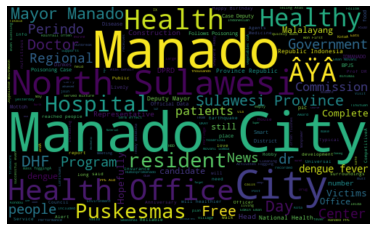

In [6]:
#wordcloud
allwords = ' '.join([twts for twts in df['tweet_en']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [7]:
#mendapatkan nilai sentimen
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,created_at,text,tweet_en,Subjectivity,Polarity,Sentiment
0,Tue Jul 14 06:01:38 +0000 2020,Kota Manado yang ku cintai Kita nyanda mo lupa...,"The city of Manado, which I love We love to fo...",0.575000,0.475000,Positive
1,Thu Feb 07 14:24:19 +0000 2019,"DBD Makan Korban, Perindo Giatkan Fogging di K...","DHF Eats Victims, Perindo Activates Fogging in...",0.000000,0.000000,Neutral
2,Fri Aug 16 14:51:25 +0000 2013,"Segera Hadir di Kota Manado ""Kursus Estetika A...","Coming Soon in Manado City ""All In One Aesthet...",0.377778,0.144444,Positive
3,Fri Feb 03 15:50:38 +0000 2017,Data Resmi Rumah Sakit di Kota Manado Provinsi...,"Official Data for Hospitals in Manado City, No...",0.400000,0.100000,Positive
4,Fri Jan 27 15:23:38 +0000 2017,Data Resmi Puskesmas di Kota Manado Provinsi S...,"Official Data of Puskesmas in Manado City, Nor...",0.000000,0.000000,Neutral
...,...,...,...,...,...,...
107,Fri May 17 08:11:47 +0000 2013,Kota Manado Juara I Kinerja Program Jaminan Ke...,Manado City Won First Place in Universal Healt...,0.444444,0.383333,Positive
108,Wed Aug 07 01:33:05 +0000 2013,I'm at RSUD Prof. DR. Dr. Kandou Malalayang (K...,I'm at Prof. DR. Dr. Kandou Malalayang (Manado...,0.000000,0.000000,Neutral
109,Sat Oct 05 23:34:13 +0000 2019,Kamis (03/10/2019) di Aula Sam Ratulangi Lanta...,"Thursday (03/10/2019) in Sam Ratulangi Hall, 4...",0.500000,0.050000,Positive
110,Tue Feb 12 16:22:36 +0000 2019,Warga Sambut Antusias Periksa Kesehatan Gratis...,Residents Enthusiastically Welcome Free Health...,0.850000,0.600000,Positive


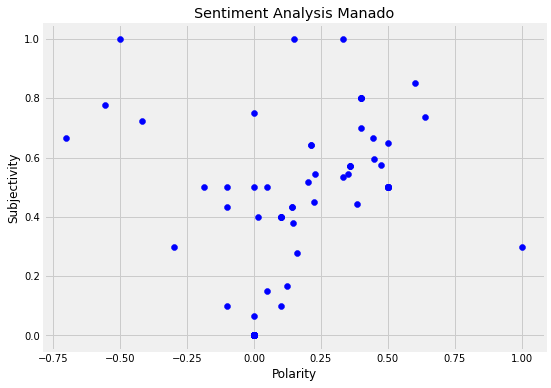

In [8]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Manado")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

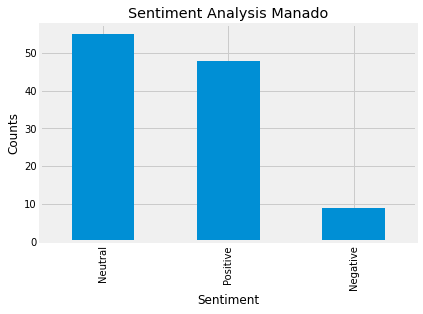

In [9]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Manado")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [10]:
df_final = df[['created_at', 'text', 'Subjectivity', 'Polarity', 'Sentiment']]
df_final

,created_at,text,Subjectivity,Polarity,Sentiment
0,Tue Jul 14 06:01:38 +0000 2020,Kota Manado yang ku cintai Kita nyanda mo lupa...,0.575000,0.475000,Positive
1,Thu Feb 07 14:24:19 +0000 2019,"DBD Makan Korban, Perindo Giatkan Fogging di K...",0.000000,0.000000,Neutral
2,Fri Aug 16 14:51:25 +0000 2013,"Segera Hadir di Kota Manado ""Kursus Estetika A...",0.377778,0.144444,Positive
3,Fri Feb 03 15:50:38 +0000 2017,Data Resmi Rumah Sakit di Kota Manado Provinsi...,0.400000,0.100000,Positive
4,Fri Jan 27 15:23:38 +0000 2017,Data Resmi Puskesmas di Kota Manado Provinsi S...,0.000000,0.000000,Neutral
...,...,...,...,...,...
107,Fri May 17 08:11:47 +0000 2013,Kota Manado Juara I Kinerja Program Jaminan Ke...,0.444444,0.383333,Positive
108,Wed Aug 07 01:33:05 +0000 2013,I'm at RSUD Prof. DR. Dr. Kandou Malalayang (K...,0.000000,0.000000,Neutral
109,Sat Oct 05 23:34:13 +0000 2019,Kamis (03/10/2019) di Aula Sam Ratulangi Lanta...,0.500000,0.050000,Positive
110,Tue Feb 12 16:22:36 +0000 2019,Warga Sambut Antusias Periksa Kesehatan Gratis...,0.850000,0.600000,Positive


In [11]:
df_final.to_csv("sentiment_manado.csv")